In [13]:
# -*- coding: utf-8 -*-

import os
import numpy as np 
from google.colab import drive
import cv2
import matplotlib.pyplot as plt
from glob import glob
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import keras
import random
from skimage.transform import rotate,rescale,resize, AffineTransform, warp
#Image augmentation using respective function with random inputs
def rotation(img):
    angle=random.randint(0,359)
    img=rotate(img,angle)
    return img
def scale(img):
    width=np.arange(10,img.shape[0],20)
    height=np.arange(10,img.shape[1],20)
    w,h=random.choice(width),random.choice(height)
    resized_img = cv2.resize(img, (w, h))
    img =np.uint8(resized_img)
    return img
def shift(img):
    horizontal_shift=random.randint(-1*img.shape[0],img.shape[0])
    vertical_shift=random.randint(-1*img.shape[1],img.shape[1])
    transform=AffineTransform(translation=(horizontal_shift,vertical_shift))
    img=warp(img,transform,mode='wrap')
    return img
def warping(img):
    shear_factor=random.uniform(-0.5,0.5)
    transform = AffineTransform(shear=shear_factor)
    img=warp(img,transform,mode='wrap')
    return img

#Reading the images 
images=[]
files=os.listdir('/content/leaves/')
for i in files:
    image=cv2.imread('/content/leaves/'+i)
    images.append(image)
    
#Choosing transformation functions randomly and performing augmentation
number_of_aug=100
for i in range(0,number_of_aug):
    image_no=random.randint(0, len(images)-1)  
    image=images[image_no]
    transformations=['rotate','scale','shift','warp']
    transform_choice=random.choice(transformations)
    if(transform_choice=='rotate'):
        aug_image=rotation(image)
    elif(transform_choice=='scale'):
        aug_image=scale(image)
    elif(transform_choice=='shift'):
        aug_image=shift(image)
    else:
        aug_image=warping(image)
    #Saving the tranformed images
    plt.imsave('/content/transformed/'+str(i)+'.png',aug_image)
 

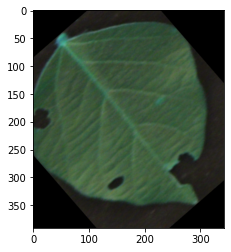

In [19]:
plt.imshow(aug_image)

In [24]:
# Image Augmentation using keras' ImageDataGenerator
for i in range(0,number_of_aug+1):
    image_no=random.randint(0, len(images)-1)  
    image=images[image_no]
    image=np.reshape(image,(1,image.shape[0],image.shape[1],image.shape[2]))
    datagen=keras.preprocessing.image.ImageDataGenerator(
		rotation_range=180,
		zoom_range=0.2,
		width_shift_range=0.3,
		height_shift_range=0.3,
		shear_range=0.2,
		horizontal_flip=True,
        vertical_flip=True)
    data_iter = datagen.flow(image, batch_size=1)
    aug_image = next(data_iter)[0].astype('uint8')
    cv2.imwrite('/content/transformed/'+str(i)+'.png',aug_image)

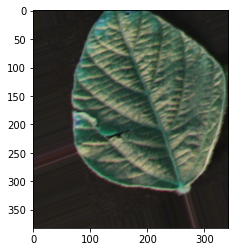

In [25]:
plt.imshow(aug_image)